# **ÎùºÏù¥Î∏åÎü¨Î¶¨**

In [59]:
!pip install koreanize-matplotlib

In [60]:
!pip install konlpy

In [61]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12.8/12.8 MB 42.5 MB/s eta 0:00:00
‚úî Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
‚ö† Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [62]:
import koreanize_matplotlib

In [63]:
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
import itertools
import networkx as nx
import matplotlib.pyplot as plt

In [64]:
import pandas as pd

# ÌååÏùº Í≤ΩÎ°ú
file_paths = [
    "/content/drive/MyDrive/tour/·Ñè·Ö≥·ÑÖ·Ö©·ÜØ·ÑÖ·Öµ·Üº/·Ñá·Ö°·Ü®·ÑÜ·ÖÆ·ÜØ·ÑÄ·Ö™·Ü´/andong_museum.csv",
    "/content/drive/MyDrive/tour/·Ñè·Ö≥·ÑÖ·Ö©·ÜØ·ÑÖ·Öµ·Üº/·Ñá·Ö°·Ü®·ÑÜ·ÖÆ·ÜØ·ÑÄ·Ö™·Ü´/andong_village.csv",
    "/content/drive/MyDrive/tour/·Ñè·Ö≥·ÑÖ·Ö©·ÜØ·ÑÖ·Öµ·Üº/·Ñá·Ö°·Ü®·ÑÜ·ÖÆ·ÜØ·ÑÄ·Ö™·Ü´/gyeongju_museum.csv",
    "/content/drive/MyDrive/·ÑÄ·Ö™·Ü´·ÑÄ·Ö™·Üº·ÑÄ·Ö©·Üº·ÑÜ·Ö©·Ñå·Ö•·Ü´/historic_site.csv"
]

# Í∞Å CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
df_list = [pd.read_csv(path) for path in file_paths]

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
review = pd.concat(df_list, ignore_index=True)
display(review)


review
0     The visit is relatively quick and interesting ...
1     The focus on Hahoe Masks could be amplified. T...
2     Free museum. Small museum to absolutely visit ...
3     I thought it would be a simple Korean traditio...
4     This museum is near to the ticket office of Ha...
...                                                 ...
1004  well preserved large complex of historic struc...
1005  Historically place Must go there in April and ...
1006  Fascinating temple in lovely setting This was ...
1007  Well worth a visit Gyeongju is a very attracti...
1008  Nice Nice place. I guess in autumn or summer i...

[1009 rows x 1 columns]

In [65]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations
from networkx.algorithms.community import greedy_modularity_communities

# ÏòÅÏñ¥ Î¶¨Î∑∞ ÎåÄÏÉÅÏù¥ÎØÄÎ°ú ÏòÅÏñ¥ Î™®Îç∏ ÏÇ¨Ïö©
nlp = spacy.load("en_core_web_sm")

# Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò: Î™ÖÏÇ¨, ÎèôÏÇ¨, ÌòïÏö©ÏÇ¨Îßå Ï∂îÏ∂ú
def extract_meaningful_words(text):
    doc = nlp(text)
    return [token.lemma_.lower() for token in doc
            if token.pos_ in ['NOUN', 'VERB', 'ADJ']
            and not token.is_stop and token.is_alpha]

# 1. Î¶¨Î∑∞ Ï†ÑÏ≤¥ Î¨∏Ïû•ÏóêÏÑú Îã®Ïñ¥Ïåç Ï∂îÏ∂ú
texts = review['review'].dropna().tolist()
co_occur_pairs = []
for sentence in texts:
    words = list(set(extract_meaningful_words(sentence)))
    co_occur_pairs += list(combinations(words, 2))

# 2. ÏÉÅÏúÑ Îã®Ïñ¥Ïåç Ï∂îÏ∂ú
pair_counts = Counter(co_occur_pairs)
top_pairs = pair_counts.most_common(300)

# 3. ÏùòÎØ∏Ïó∞Í≤∞Îßù ÏÉùÏÑ±
G = nx.Graph()
for (w1, w2), freq in top_pairs:
    G.add_edge(w1, w2, weight=freq)

# 4. Ïª§ÎÆ§ÎãàÌã∞ ÌÉêÏÉâ
communities = list(greedy_modularity_communities(G))
community_map = {}
for i, com in enumerate(communities):
    for word in com:
        community_map[word] = i

# 5. ÏÉâÏÉÅ Îß§Ìïë
color_list = plt.cm.tab10.colors  # ÏµúÎåÄ 10Í∞ú Ïª§ÎÆ§ÎãàÌã∞ ÏÉâÏÉÅ
node_colors = [color_list[community_map[node] % len(color_list)] for node in G.nodes()]

# 6. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 14))
pos = nx.spring_layout(G, seed=42, k=0.3)  # Î†àÏù¥ÏïÑÏõÉ Í≥†Ï†ï
nx.draw_networkx_nodes(G, pos, node_size=80, node_color=node_colors, alpha=0.9)
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.title("ÏùòÎØ∏Ïó∞Í≤∞Îßù Í∑∏ÎûòÌîÑ (Î™ÖÏÇ¨ + ÎèôÏÇ¨ + ÌòïÏö©ÏÇ¨, Ïª§ÎÆ§ÎãàÌã∞ ÏÉâÏÉÅ)", fontsize=14)
plt.axis('off')
plt.show()


In [66]:
# Î®ºÏ†Ä ÏòÅÏñ¥ Í∞êÏÑ± Î∂ÑÏÑùÏùÑ ÏúÑÌï¥ nltkÏùò Vader ÏÑ§Ïπò Î∞è Î°úÎî©
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Í∞êÏÑ± Î∂ÑÏÑùÍ∏∞ Ï¥àÍ∏∞Ìôî
sid = SentimentIntensityAnalyzer()

# Í∞êÏÑ± Ï†êÏàò Í≥ÑÏÇ∞ Ìï®Ïàò
def get_sentiment_score(text):
    if pd.isnull(text) or not isinstance(text, str):
        return None
    return sid.polarity_scores(text)['compound']

# Í∞êÏÑ± Ï†êÏàò Í≥ÑÏÇ∞ Î∞è Ï∂îÍ∞Ä
review['sentiment_score'] = review['review'].apply(get_sentiment_score)

# Í∞êÏÑ± Î†àÏù¥Î∏î Î∂ÄÏó¨: Í∏çÏ†ï / Ï§ëÎ¶Ω / Î∂ÄÏ†ï
def label_sentiment(score):
    if score is None:
        return 'neutral'
    elif score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

review['sentiment_label'] = review['sentiment_score'].apply(label_sentiment)

# Í≤∞Í≥º ÎØ∏Î¶¨ Î≥¥Í∏∞
review[['review', 'sentiment_score', 'sentiment_label']].head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


review  sentiment_score  \
0  The visit is relatively quick and interesting ...           0.2500   
1  The focus on Hahoe Masks could be amplified. T...           0.0000   
2  Free museum. Small museum to absolutely visit ...           0.6901   
3  I thought it would be a simple Korean traditio...           0.7574   
4  This museum is near to the ticket office of Ha...           0.6808   

  sentiment_label  
0        positive  
1         neutral  
2        positive  
3        positive  
4        positive

/tmp/ipython-input-67-445784590.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=review, x='sentiment_label', order=['positive', 'neutral', 'negative'], palette='Set2')


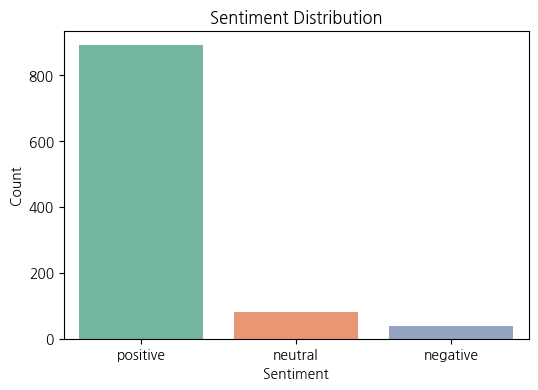

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=review, x='sentiment_label', order=['positive', 'neutral', 'negative'], palette='Set2')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


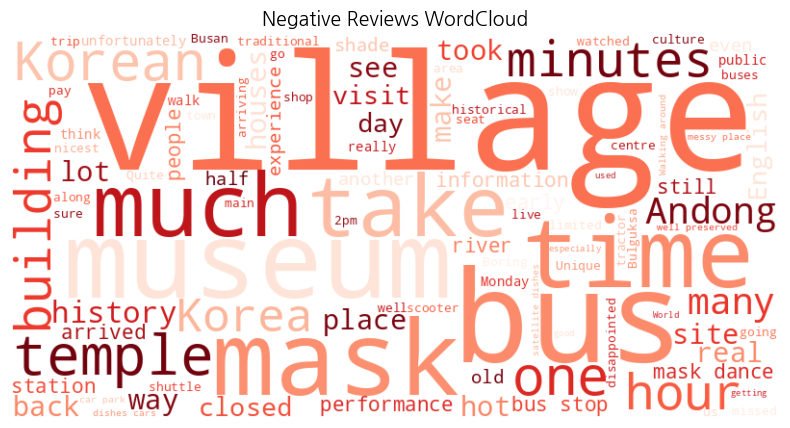

In [68]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò (Îã®Ïñ¥Îßå Ï∂îÏ∂ú)
def get_wordcloud_text(df, sentiment_label):
    texts = df[df['sentiment_label'] == sentiment_label]['review'].dropna().tolist()
    return " ".join(texts)

from wordcloud import WordCloud

# Í∏çÏ†ï/Î∂ÄÏ†ï Î¶¨Î∑∞ ÌÖçÏä§Ìä∏ Í≤∞Ìï©
positive_text = " ".join(review[review['sentiment_label'] == 'positive']['review'].dropna().tolist())
negative_text = " ".join(review[review['sentiment_label'] == 'negative']['review'].dropna().tolist())

# ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú Í∑∏Î¶¨Í∏∞ Ìï®Ïàò
def draw_wordcloud_colormap(text, title, colormap):
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          max_words=100, colormap=colormap).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=14)
    plt.show()

# Í∏çÏ†ï Î¶¨Î∑∞ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú (Ï¥àÎ°ùÏÉâ Í≥ÑÏó¥)
draw_wordcloud_colormap(positive_text, "Positive Reviews WordCloud", colormap='Greens')

# Î∂ÄÏ†ï Î¶¨Î∑∞ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú (Îπ®Í∞ÑÏÉâ Í≥ÑÏó¥)
draw_wordcloud_colormap(negative_text, "Negative Reviews WordCloud", colormap='Reds')


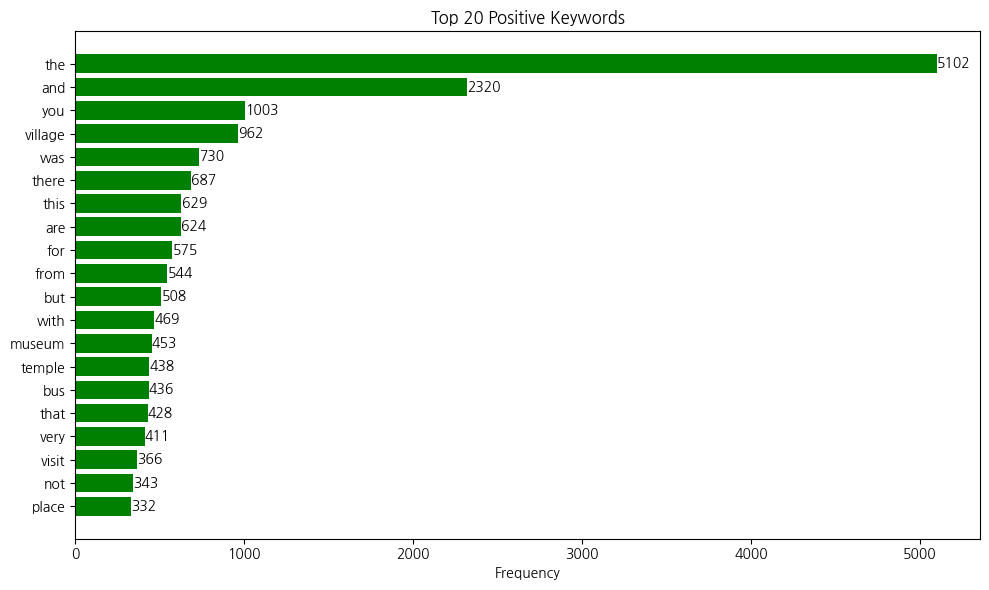

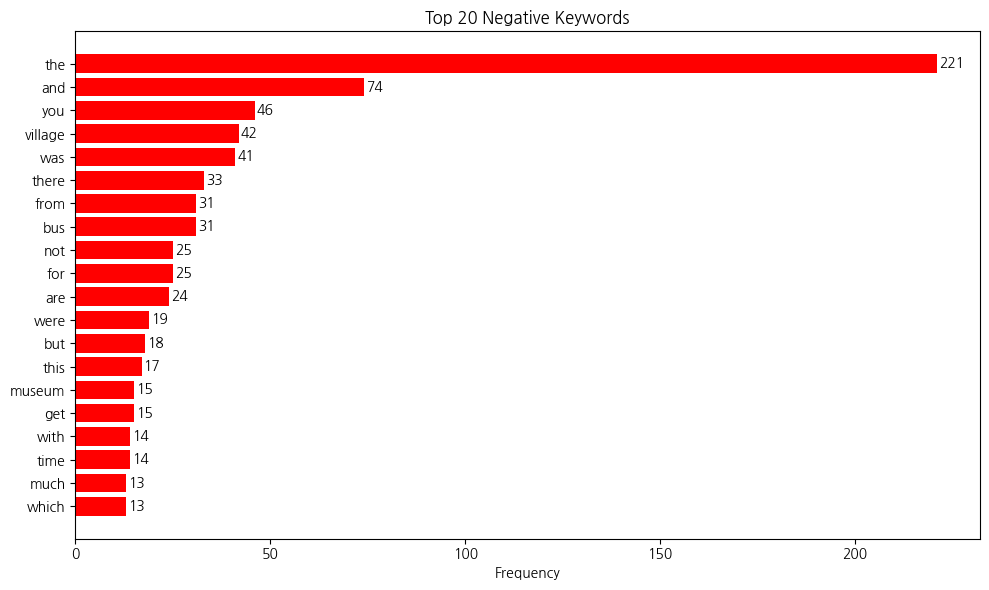

In [69]:
# Í∏çÏ†ï/Î∂ÄÏ†ï Î¶¨Î∑∞ ÌÖçÏä§Ìä∏ ÏàòÏßë
positive_reviews = review[review['sentiment_label'] == 'positive']['review'].dropna().tolist()
negative_reviews = review[review['sentiment_label'] == 'negative']['review'].dropna().tolist()

# Í∞ÑÎã®Ìïú Ï†ÑÏ≤òÎ¶¨: ÏÜåÎ¨∏Ïûê + ÏïåÌååÎ≤≥Îßå Ï∂îÏ∂ú
import re
from collections import Counter

def tokenize(text_list):
    words = []
    for text in text_list:
        tokens = re.findall(r'\b[a-z]{3,}\b', text.lower())  # 3Ïûê Ïù¥ÏÉÅ ÏòÅÎ¨∏ÏûêÎßå
        words.extend(tokens)
    return words

# ÌÜ†ÌÅ∞Ìôî Î∞è Îã®Ïñ¥ ÎπàÎèÑÏàò Í≥ÑÏÇ∞
positive_words = tokenize(positive_reviews)
negative_words = tokenize(negative_reviews)

positive_counts = Counter(positive_words)
negative_counts = Counter(negative_words)

# ÏÉÅÏúÑ 20Í∞ú ÌÇ§ÏõåÎìú Ï∂îÏ∂ú
top_pos = positive_counts.most_common(20)
top_neg = negative_counts.most_common(20)

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò
df_pos = pd.DataFrame(top_pos, columns=['Keyword', 'Frequency'])
df_neg = pd.DataFrame(top_neg, columns=['Keyword', 'Frequency'])

# ÏãúÍ∞ÅÌôî: Í∏çÏ†ï ÌÇ§ÏõåÎìú
plt.figure(figsize=(10, 6))
bars = plt.barh(df_pos['Keyword'][::-1], df_pos['Frequency'][::-1], color='green')
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}', va='center')
plt.title("Top 20 Positive Keywords")
plt.xlabel("Frequency")
plt.tight_layout()
plt.show()

# ÏãúÍ∞ÅÌôî: Î∂ÄÏ†ï ÌÇ§ÏõåÎìú
plt.figure(figsize=(10, 6))
bars = plt.barh(df_neg['Keyword'][::-1], df_neg['Frequency'][::-1], color='red')
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}', va='center')
plt.title("Top 20 Negative Keywords")
plt.xlabel("Frequency")
plt.tight_layout()
plt.show()


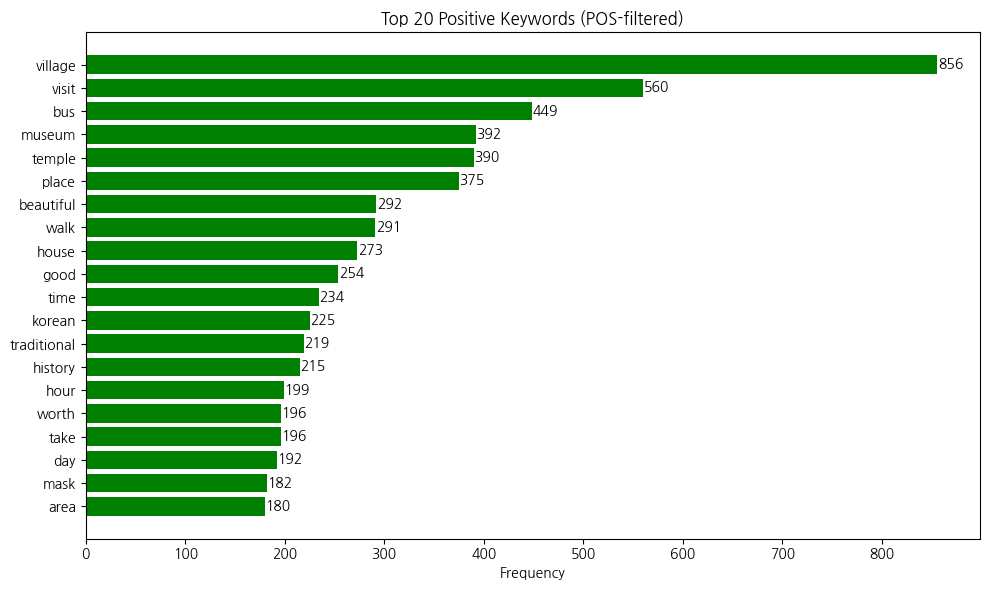

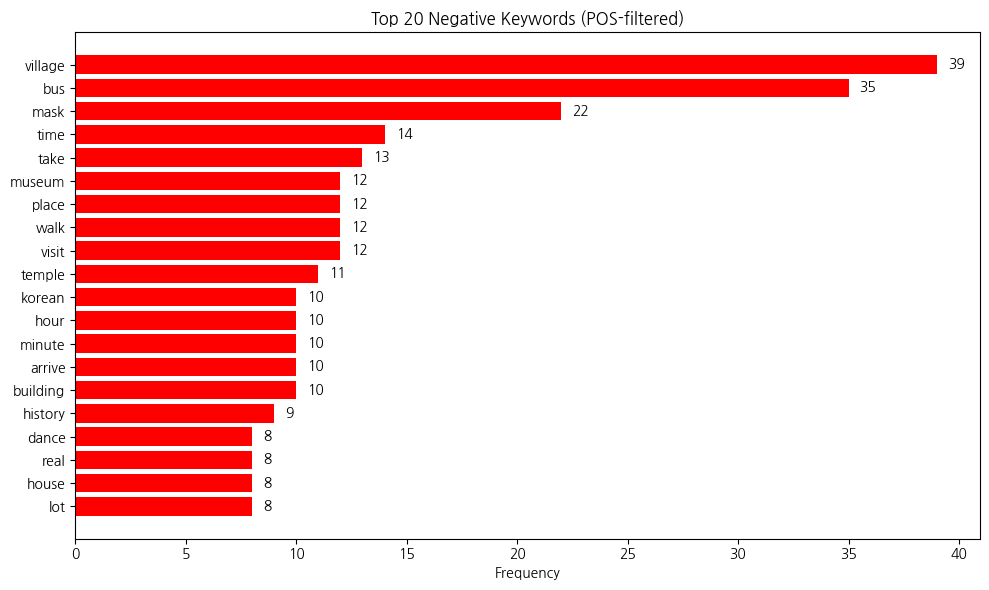

In [70]:
# 4. spaCy Î°úÎìú Î∞è ÌòïÌÉúÏÜå Ï∂îÏ∂ú Ìï®Ïàò (Î™ÖÏÇ¨/ÎèôÏÇ¨/ÌòïÏö©ÏÇ¨ + Î∂àÏö©Ïñ¥ Ï†úÍ±∞)
nlp = spacy.load("en_core_web_sm")

def extract_meaningful_words(text_list):
    words = []
    for doc in nlp.pipe(text_list):
        words += [
            token.lemma_.lower() for token in doc
            if token.pos_ in ['NOUN', 'VERB', 'ADJ']
            and not token.is_stop and token.is_alpha
        ]
    return words

# 5. Í∞êÏÑ±Î≥Ñ Îã®Ïñ¥ Î¶¨Ïä§Ìä∏ ÏÉùÏÑ±
positive_reviews = review[review['sentiment_label'] == 'positive']['review'].dropna().tolist()
negative_reviews = review[review['sentiment_label'] == 'negative']['review'].dropna().tolist()

positive_words = extract_meaningful_words(positive_reviews)
negative_words = extract_meaningful_words(negative_reviews)

# 6. ÏÉÅÏúÑ 20Í∞ú ÌÇ§ÏõåÎìú Ï∂îÏ∂ú
positive_counts = Counter(positive_words)
negative_counts = Counter(negative_words)

df_pos = pd.DataFrame(positive_counts.most_common(20), columns=['Keyword', 'Frequency'])
df_neg = pd.DataFrame(negative_counts.most_common(20), columns=['Keyword', 'Frequency'])

# 7. ÎßâÎåÄÍ∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
def plot_keyword_bar(df, color, title):
    plt.figure(figsize=(10, 6))
    bars = plt.barh(df['Keyword'][::-1], df['Frequency'][::-1], color=color)
    for bar in bars:
        plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
                 f'{int(bar.get_width())}', va='center')
    plt.title(title)
    plt.xlabel("Frequency")
    plt.tight_layout()
    plt.show()

plot_keyword_bar(df_pos, color='green', title='Top 20 Positive Keywords (POS-filtered)')
plot_keyword_bar(df_neg, color='red', title='Top 20 Negative Keywords (POS-filtered)')

## villiage, museum Ï†úÍ±∞

In [71]:
# 6. spaCy Î°úÎìú + ÏÇ¨Ïö©Ïûê Î∂àÏö©Ïñ¥ Ï†ïÏùò
nlp = spacy.load("en_core_web_sm")
custom_stopwords = {'museum', 'museums', 'village', 'villages', 'hahoe', 'andong', 'gyeongju'}

In [72]:
# 7. ÌíàÏÇ¨ ÌïÑÌÑ∞ÎßÅ + Î∂àÏö©Ïñ¥ Ï†úÍ±∞ Ìï®Ïàò
def extract_meaningful_words(text_list):
    words = []
    for doc in nlp.pipe(text_list):
        words += [
            token.lemma_.lower() for token in doc
            if token.pos_ in ['NOUN', 'VERB', 'ADJ']
            and not token.is_stop
            and token.is_alpha
            and token.lemma_.lower() not in custom_stopwords
        ]
    return words

# 8. Í∞êÏÑ±Î≥Ñ Î¶¨Î∑∞ ÌÖçÏä§Ìä∏ ÏàòÏßë
positive_reviews = review[review['sentiment_label'] == 'positive']['review'].dropna().tolist()
negative_reviews = review[review['sentiment_label'] == 'negative']['review'].dropna().tolist()

# 9. Ï†ÑÏ≤òÎ¶¨ ÌõÑ Îã®Ïñ¥ Ï∂îÏ∂ú
positive_words = extract_meaningful_words(positive_reviews)
negative_words = extract_meaningful_words(negative_reviews)

positive_counts = Counter(positive_words)
negative_counts = Counter(negative_words)


In [73]:
# Î¶¨Î∑∞ÏóêÏÑú Îã®Ïñ¥Ïåç ÏÉùÏÑ± (Í∞Å Î¨∏Ïû•Î≥Ñ Í≥µÍ∏∞Ï∂úÌòÑ Í∏∞Î∞ò)
texts = review['review'].dropna().tolist()
co_occur_pairs = []

for sentence in texts:
    tokens = list(set(extract_meaningful_words([sentence])))
    co_occur_pairs += list(combinations(tokens, 2))

# ÏÉÅÏúÑ Ïó∞Í¥Ä Îã®Ïñ¥Ïåç Ï∂îÏ∂ú
pair_counts = Counter(co_occur_pairs)
top_pairs = pair_counts.most_common(300)  # ÏÉÅÏúÑ 300Ïåç

# ÏùòÎØ∏Ïó∞Í≤∞Îßù Í∑∏ÎûòÌîÑ Íµ¨ÏÑ±
G = nx.Graph()
for (w1, w2), freq in top_pairs:
    G.add_edge(w1, w2, weight=freq)

# Ïª§ÎÆ§ÎãàÌã∞ ÌÉêÏßÄ
communities = list(greedy_modularity_communities(G))
community_map = {}
for i, com in enumerate(communities):
    for word in com:
        community_map[word] = i

# ÎÖ∏ÎìúÎ≥Ñ ÏÉâÏÉÅ Ìï†Îãπ
color_list = plt.cm.tab10.colors
node_colors = [color_list[community_map[node] % len(color_list)] for node in G.nodes()]

# ÏãúÍ∞ÅÌôî
# Í∞úÏÑ†Îêú ÏãúÍ∞ÅÌôî ÏΩîÎìú ÏùºÎ∂Ä
pos = nx.spring_layout(G, seed=42, k=0.5)  # Îçî ÎÑìÍ≤å ÌçºÏßÄÎèÑÎ°ù

plt.figure(figsize=(16, 12))
nx.draw_networkx_nodes(G, pos, node_size=80, node_color=node_colors, alpha=0.9)
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=13)
plt.title("Semantic Network (Improved Layout & Readability)", fontsize=15)
plt.axis('off')
plt.show()


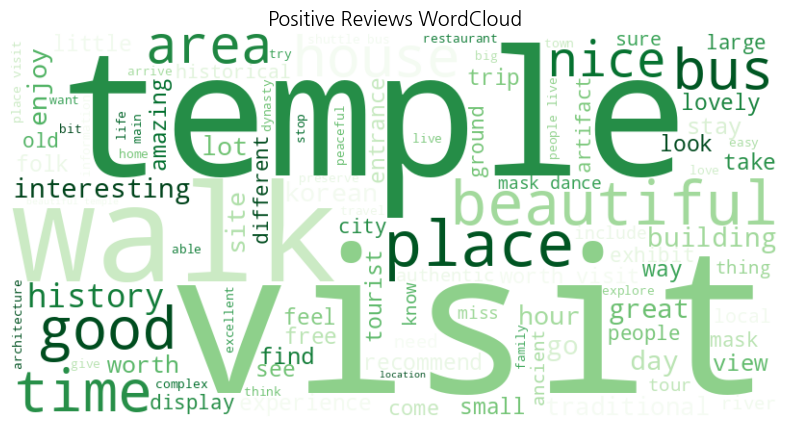

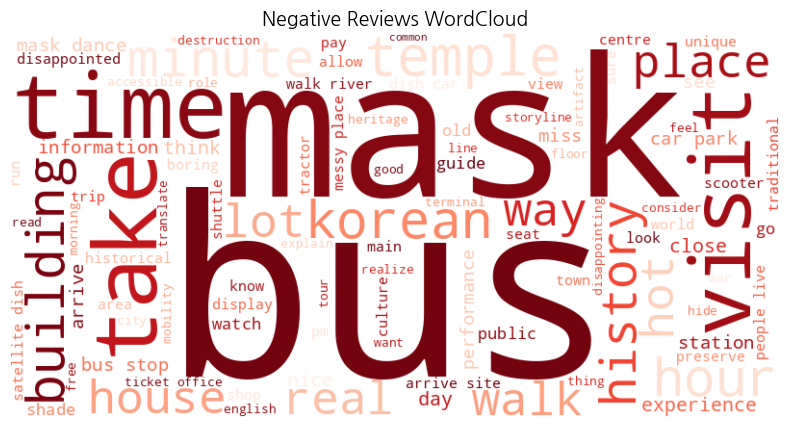

In [74]:
# 10. Í∞êÏÑ±Î≥Ñ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏãúÍ∞ÅÌôî
def draw_wordcloud(words, title, colormap):
    text = " ".join(words)
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          colormap=colormap, max_words=100).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=14)
    plt.show()

draw_wordcloud(positive_words, "Positive Reviews WordCloud", colormap='Greens')
draw_wordcloud(negative_words, "Negative Reviews WordCloud", colormap='Reds')


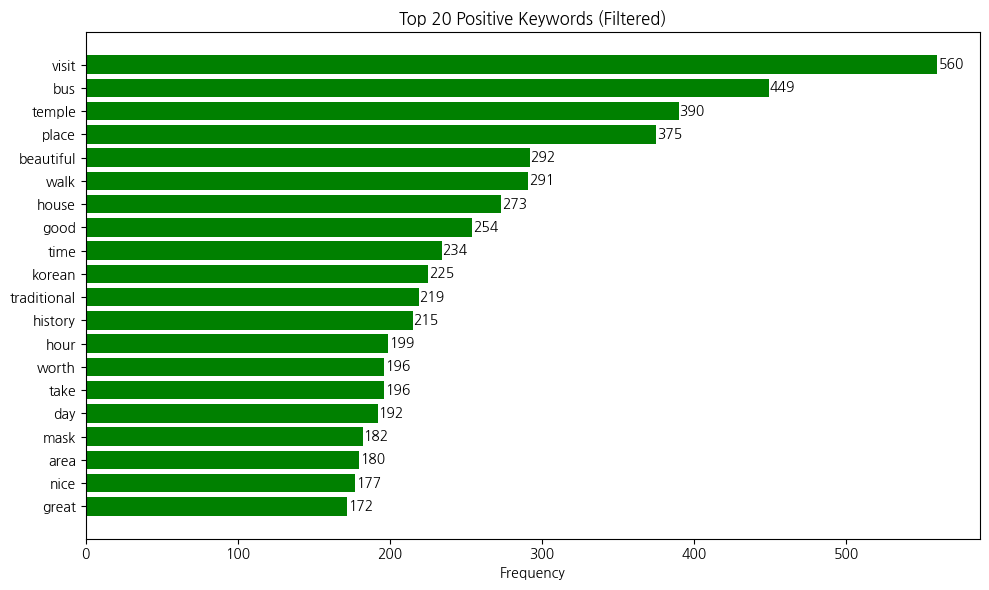

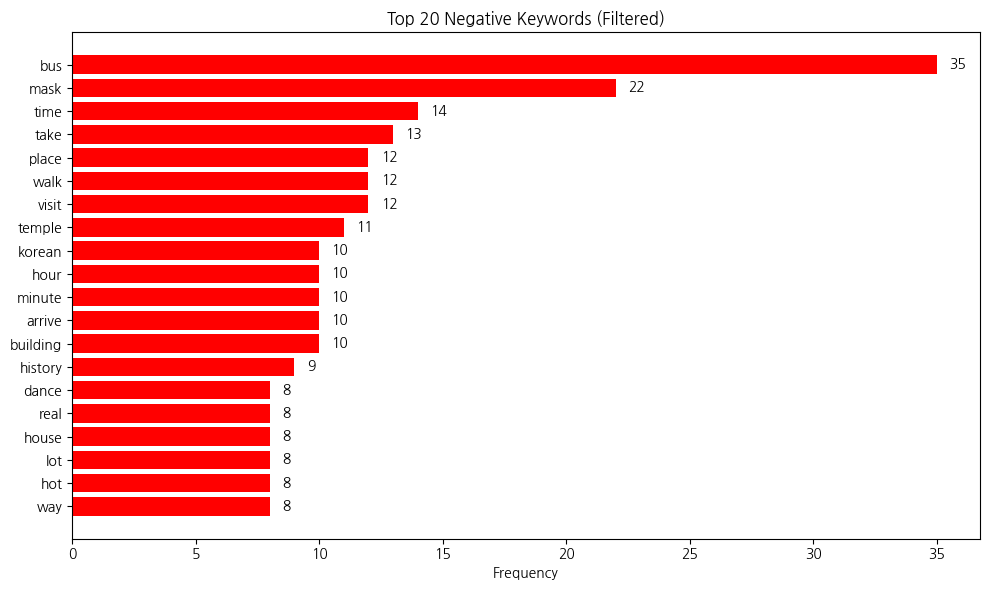

In [75]:
# 11. Í∞êÏÑ±Î≥Ñ ÌÇ§ÏõåÎìú ÎßâÎåÄÍ∑∏ÎûòÌîÑ
def plot_keyword_bar(counter_data, color, title):
    top_keywords = counter_data.most_common(20)
    df = pd.DataFrame(top_keywords, columns=['Keyword', 'Frequency'])
    plt.figure(figsize=(10, 6))
    bars = plt.barh(df['Keyword'][::-1], df['Frequency'][::-1], color=color)
    for bar in bars:
        plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
                 f'{int(bar.get_width())}', va='center')
    plt.title(title)
    plt.xlabel("Frequency")
    plt.tight_layout()
    plt.show()

plot_keyword_bar(positive_counts, 'green', 'Top 20 Positive Keywords (Filtered)')
plot_keyword_bar(negative_counts, 'red', 'Top 20 Negative Keywords (Filtered)')

In [76]:
# 1. ÏÑ§Ïπò Î∞è Î∂àÏö©Ïñ¥ ÏÇ¨Ï†Ñ Ï†ïÏùò
import pandas as pd
import numpy as np
import spacy
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter
from itertools import combinations
import matplotlib.colors as mcolors

# 3. spaCy Î°úÎî© & Î∂àÏö©Ïñ¥ Ï†ïÏùò
nlp = spacy.load("en_core_web_sm")
custom_stopwords = {'museum', 'village', 'hahoe', 'andong', 'gyeongju', 'place', 'visit'}

def extract_tokens(text):
    doc = nlp(str(text))
    return [
        token.lemma_.lower()
        for token in doc
        if token.pos_ in ['NOUN', 'VERB', 'ADJ']
        and not token.is_stop
        and token.is_alpha
        and token.lemma_.lower() not in custom_stopwords
    ]



In [77]:
# 4. üì• Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
# (1) Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞
file_paths = {
    "/content/drive/MyDrive/tour/ÌÅ¨Î°§ÎßÅ/Î∞ïÎ¨ºÍ¥Ä/andong_museum.csv": "Andong Museum",
    "/content/drive/MyDrive/tour/ÌÅ¨Î°§ÎßÅ/Î∞ïÎ¨ºÍ¥Ä/andong_village.csv": "Hahoe Village",
    "/content/drive/MyDrive/tour/ÌÅ¨Î°§ÎßÅ/Î∞ïÎ¨ºÍ¥Ä/gyeongju_museum.csv": "Gyeongju Museum",
    "/content/drive/MyDrive/tour/ÌÅ¨Î°§ÎßÅ/Ïú†Ï†ÅÏßÄ/bulguksa.csv": "Bulguksa"
}

df_list = []
for path, place in file_paths.items():
    df = pd.read_csv(path)
    df["place"] = place
    df_list.append(df)

review = pd.concat(df_list, ignore_index=True)

# (2) ÏÑ§Î¨∏ Îç∞Ïù¥ÌÑ∞
df_2024 = pd.read_excel("/content/drive/MyDrive/tour/data/elsx/2024 Ïô∏ÎûòÍ¥ÄÍ¥ëÍ∞ùÏ°∞ÏÇ¨_Data.xlsx")

In [78]:
# 5. Q13 Ïû¨Î∞©Î¨∏ÏùòÌñ• Í≥ÑÏÇ∞ (Í∞ÄÏ§ëÌèâÍ∑†)
place_map = {
    47004.0: "Bulguksa",
    47001.0: "Hahoe Village",
    47020.0: "Gyeongju Museum",
    47916.0: "Andong Museum"
}
df_2024["place"] = df_2024["Q9_1_1"].map(place_map)

def weighted_avg(series, weights):
    mask = series.notna() & weights.notna()
    return np.average(series[mask], weights=weights[mask]) if mask.sum() > 0 else None

place_q13 = (
    df_2024[["place", "Q13", "weight"]]
    .dropna()
    .groupby("place", group_keys=False)
    .apply(lambda g: pd.Series({"q13_mean": weighted_avg(g["Q13"], g["weight"])}))
    .reset_index()
)

/tmp/ipython-input-78-527474898.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: pd.Series({"q13_mean": weighted_avg(g["Q13"], g["weight"])}))


In [79]:
# 6. Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞Ïóê q13 Î≥ëÌï© + tokens ÏÉùÏÑ±
review = review.merge(place_q13, on="place", how="left")
review["tokens"] = review["review"].apply(extract_tokens)

# 7. ÏùòÎØ∏Ïó∞Í≤∞Îßù ÏãúÍ∞ÅÌôî Ìï®Ïàò
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter
from itertools import combinations
import matplotlib.colors as mcolors

def plot_network_with_q13_reviews(df, top_n=80):
    # 1. Îã®Ïñ¥Ïåç Ï∂îÏ∂ú Î∞è Q13 Í∞ÄÏ§ëÏπò ÏàòÏßë
    cooccurrence = []
    word_q13 = []

    for _, row in df.iterrows():
        tokens = row["tokens"]
        q13 = row["q13_mean"]
        if isinstance(tokens, list) and len(tokens) >= 2:
            tokens = list(set(tokens))  # Ï§ëÎ≥µ Ï†úÍ±∞
            cooccurrence += list(combinations(tokens, 2))
            for word in tokens:
                word_q13.append((word, q13))

    # 2. Ï∂úÌòÑ ÎπàÎèÑ ÎÜíÏùÄ Îã®Ïñ¥Ïåç ÏÑ†Ï†ï
    pair_counts = Counter(cooccurrence).most_common(top_n)

    if not pair_counts:
        print("‚ö†Ô∏è Îã®Ïñ¥ÏåçÏù¥ Ï∂©Î∂ÑÌïòÏßÄ ÏïäÏïÑ ÎÑ§Ìä∏ÏõåÌÅ¨Î•º ÏÉùÏÑ±Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")
        return

    # 3. Îã®Ïñ¥Î≥Ñ Q13 ÌèâÍ∑† Í≥ÑÏÇ∞
    df_word_q13 = pd.DataFrame(word_q13, columns=["word", "q13"])
    word_avg_q13 = df_word_q13.groupby("word")["q13"].mean().to_dict()

    # 4. Í∑∏ÎûòÌîÑ Íµ¨ÏÑ±
    G = nx.Graph()
    for (w1, w2), count in pair_counts:
        G.add_edge(w1, w2, weight=count)

    pos = nx.spring_layout(G, k=0.5, seed=42)
    weights = [d["weight"] for _, _, d in G.edges(data=True)]
    node_colors = [word_avg_q13.get(n, 4.5) for n in G.nodes()]  # Í∏∞Î≥∏Í∞í 4.5

    # 5. ÏãúÍ∞ÅÌôî
    fig, ax = plt.subplots(figsize=(12, 10))

    nx.draw(
        G, pos, ax=ax, with_labels=True, node_size=900, font_size=11,
        edge_color=weights, edge_cmap=plt.cm.Blues, width=2,
        edge_vmin=min(weights), edge_vmax=max(weights),
        node_color=node_colors, cmap=plt.cm.Reds
    )

    # üéØ colorbarÎ•º ÏúÑÌïú Î™ÖÌôïÌïú Ï†ïÍ∑úÌôî ÏÑ§Ï†ï
    norm = mcolors.Normalize(vmin=min(node_colors), vmax=max(node_colors))
    sm = plt.cm.ScalarMappable(cmap=plt.cm.Reds, norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax)
    cbar.set_label("ÌèâÍ∑† Q13 (Ïû¨Î∞©Î¨∏ ÏùòÌñ•)")

    ax.set_title("[ÏòÅÏñ¥ Î¶¨Î∑∞ Í∏∞Î∞ò] ÏùòÎØ∏Ïó∞Í≤∞Îßù √ó Ïû¨Î∞©Î¨∏ ÏùòÌñ•", fontsize=14)
    plt.tight_layout()
    plt.show()



# ‚úÖ Ïã§Ìñâ
plot_network_with_q13_reviews(review, top_n=80)